In [1]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import sys  
sys.path.insert(0, 'G:\\My Drive\\Colab Notebooks\\tensorflow-wavelets\src')

from tensorflow_wavelets.utils.cast import *
from tensorflow_wavelets.Layers.DMWT import *
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow import keras

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [3]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    
    self.encoder = tf.keras.Sequential([
        DMWT(wave_name="ghm"),
        layers.Flatten(),
        layers.Dense(latent_dim),
    ])
    
    self.decoder = tf.keras.Sequential([
        layers.Dense(3136),
        layers.Reshape((56, 56, 1)),
        IDMWT(wave_name="ghm"),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [4]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0125 - val_loss: 0.0097
Epoch 2/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0100 - val_loss: 0.0096
Epoch 3/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0099 - val_loss: 0.0096
Epoch 4/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0099 - val_loss: 0.0096
Epoch 5/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0099 - val_loss: 0.0097
Epoch 6/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0099 - val_loss: 0.0097
Epoch 7/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0099 - val_loss: 0.0096
Epoch 8/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0099 - val_loss: 0.0097
Epoch 9/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.00

In [5]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

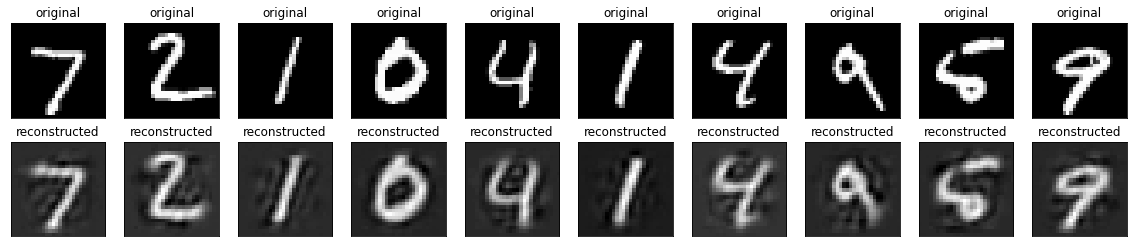

In [6]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
model = keras.Sequential()
model.add(keras.Input(shape=(28, 28, 1)))

model.add(DMWT(wave_name="ghm"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="sigmoid"))
model.add(keras.layers.Dense(3136, activation="sigmoid"))
model.add(keras.layers.Reshape((56, 56, 1)))
model.add(IDMWT(wave_name="ghm"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dmwt_1 (DMWT)                (None, 56, 56, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_3 (Dense)              (None, 3136)              404544    
_________________________________________________________________
reshape_1 (Reshape)          (None, 56, 56, 1)         0         
_________________________________________________________________
idmwt_1 (IDMWT)              (None, 28, 28, 1)         0         
Total params: 806,080
Trainable params: 806,080
Non-trainable params: 0
________________________________________________